## Importy niezbędnych bibliotek

In [30]:
import numpy as np
import matplotlib.pyplot as plt

## Definicja klasy symulacyjnej - TaskSimulation

In [31]:
class TaskSimulation:
    def __init__(self, lambda_in, lambda_task, num_tasks):
        self.lambda_in = lambda_in
        self.lambda_task = lambda_task
        self.num_tasks = num_tasks
        self.arrival_times = []
        self.task_durations = []
        self.completion_times = []
        self.queue_lengths_at_arrival = []
        self.queue_lengths_at_departure = []

    def generate_time_step(self):
        """Generuje krok czasowy dla przybycia zadania i czasu jego wykonania."""
        return -np.log(np.random.uniform()) / self.lambda_in, -np.log(np.random.uniform()) / self.lambda_task

    def process_task(self):
        """Przetwarza pojedyncze zadanie, aktualizując czasy przybycia, wykonania i długości kolejek."""
        arrival_time_step, task_duration = self.generate_time_step()
        arrival_time = self.arrival_times[-1] + arrival_time_step if self.arrival_times else arrival_time_step
        self.arrival_times.append(arrival_time)
        self.task_durations.append(task_duration)
        
        completion_time = max(arrival_time, self.completion_times[-1] if self.completion_times else 0) + task_duration
        self.completion_times.append(completion_time)
        
        tasks_in_queue = sum(1 for completion_time in self.completion_times if completion_time > arrival_time)
        self.queue_lengths_at_arrival.append(tasks_in_queue)

    def simulate(self):
        """Uruchamia symulację dla określonej liczby zadań."""
        for _ in range(self.num_tasks):
            self.process_task()
        self.calculate_queue_lengths_at_departure()

    def calculate_queue_lengths_at_departure(self):
        """Oblicza długości kolejek w momencie zakończenia zadań."""
        for index, completion_time in enumerate(self.completion_times):
            tasks_in_queue = sum(1 for arrival_time in self.arrival_times[index + 1:] if arrival_time < completion_time)
            self.queue_lengths_at_departure.append(tasks_in_queue)

    def plot_queues(self):
        """Rysuje wykres długości kolejek przy przybyciu i zakończeniu zadań na jednym wykresie."""
        plt.figure(figsize=(10, 6))

        plt.scatter(self.arrival_times, self.queue_lengths_at_arrival, s=12, color='blue', label='Przybycie')
        plt.scatter(self.completion_times, self.queue_lengths_at_departure, s=12, color='red', label='Zakończenie')

        plt.xlabel("Czas")
        plt.ylabel("Długość kolejki")
        plt.title("Długość kolejki przy przybyciu i zakończeniu zadań")
        plt.legend()

        plt.show()


    def plot_waiting_times(self):
        """Rysuje wykres czasów oczekiwania zadań na wykonanie."""
        plt.figure(figsize=(10, 6))

        waiting_times = [completion - arrival - duration for arrival, completion, duration in zip(self.arrival_times, self.completion_times, self.task_durations)]
        plt.scatter(self.arrival_times, waiting_times, s=12)
        plt.xlabel("Czas przybycia")
        plt.ylabel("Czas oczekiwania")
        plt.title("Czas oczekiwania na wykonanie zadania")
        plt.show()

### Inicjalizacja symulacji z określonymi parametrami:
##### lambda_in = 5 (intensywność przybycia zadań),
##### lambda_task = 3 (intensywność przetwarzania zadań),
##### num_tasks = 10 (łączna liczba zadań do przetworzenia).

In [32]:
if __name__ == "__main__":
    task = TaskSimulation(5, 3, 10)

### Uruchomienie metody simulate, która przeprowadza symulację.
Symulacja polega na generowaniu zadań zgodnie z określonymi parametrami oraz obliczaniu czasów ich przybycia, zakończenia i długości kolejek.

In [33]:
task.simulate()

Wywołanie metody plot_queues generuje wykres, który pokazuje długość kolejek w momencie przybycia nowego zadania oraz w momencie zakończenia zadania.
Pozwala to na wizualizację zmian długości kolejki w czasie.

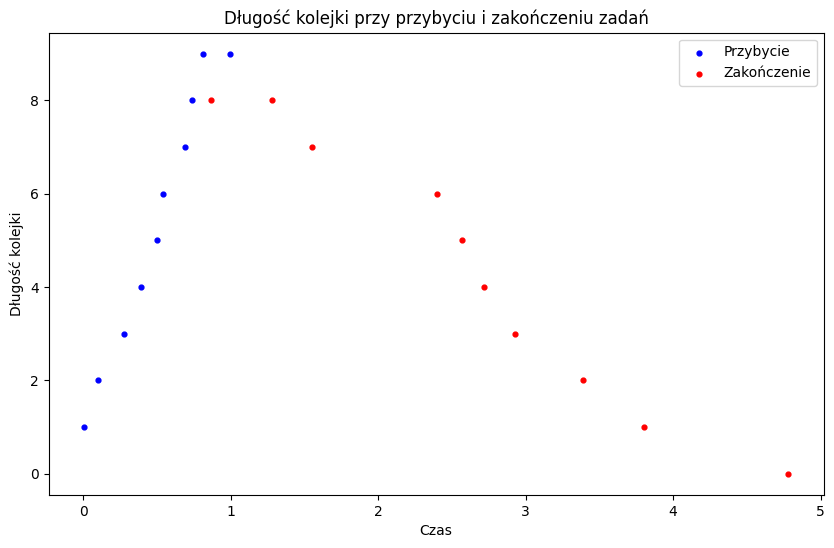

In [34]:
task.plot_queues()

Wywołanie metody plot_waiting_times generuje wykres czasów oczekiwania na wykonanie zadania. Czas oczekiwania jest różnicą między czasem zakończenia a czasem przybycia zadania, pomniejszoną o czas potrzebny na jego wykonanie. Wykres ten pozwala zrozumieć, jak długo zadania muszą czekać na przetworzenie.

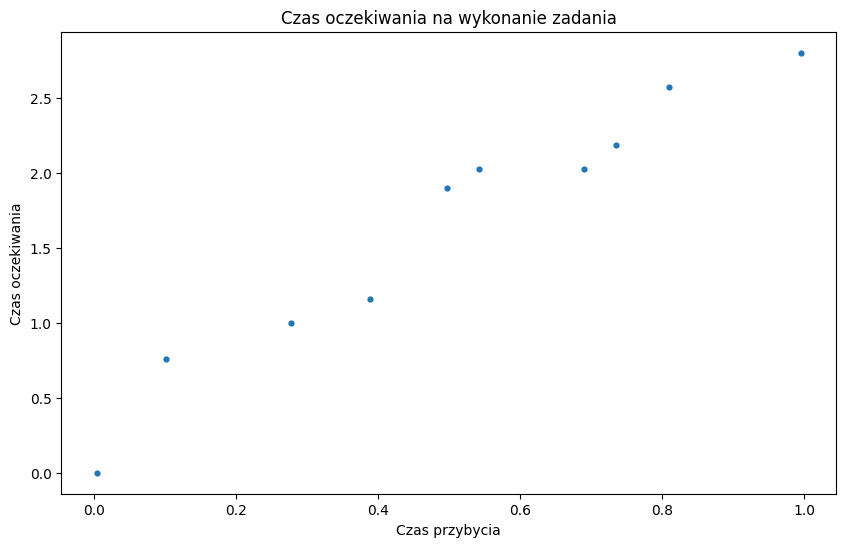

In [35]:
task.plot_waiting_times()

### Obserwacje i wioski

System wydaje się mieć tendencję do zwiększania długości kolejki wraz z czasem, co spowodowane jest tym, że zadania przybywają szybciej niż są przetwarzane.Na podstawie dostarczonych wykresów można zauważyć, że zadania przybywające później do systemu często wiążą się z dłuższym czasem obsługi. Ten trend może być wynikiem kumulacji zadań w systemie, co prowadzi do ich dłuższego przetwarzania. Zwiększająca się długość kolejki wraz z upływem czasu wskazuje na to, że system może nie nadążać z efektywnym przetwarzaniem przychodzących zadań, co skutkuje dłuższym czasem oczekiwania dla zadań przybywających w późniejszym czasie. Jest to typowa sytuacja dla systemów, w których obciążenie przekracza ich przepustowość operacyjną, prowadząc do akumulacji zadań i wydłużenia czasu ich obsługi.